In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

connection = sqlite3.connect('titanic.db')
cursor = connection.cursor()

def select(query):
    try:
        return pd.read_sql_query(query, connection)
    except:
        cursor.executescript(query)
        connection.commit()


In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Информация о столбцах:

> `PassengerId`: уникальный id пассажира <br>
`Pclass`: класс каюты, в которой ехал пассажир (1, 2 или 3)<br>
`Name`: имя пассажира<br>
`Sex`: пол пассажира<br>
`Age`: возраст пассажира<br>
`SibSp`: общее количество братьев, сестер и супругов пассажира, которые также ехали на Титанике<br>
`Parch`: общее количество родителей и детей пассажира, которые также ехали на Титанике<br>
`Ticket`: номер билета пассажира<br>
`Fare`: стоимость билета пассажира<br>
`Cabin`: номер каюты пассажира<br>
`Embarked`: в каком порту пассажир сел на Титаник:<br>
> - S: Southhampton<br>
> - C: Cherbourg<br>
> - Q: Queenstown<br>



titanic.describe()

<center><div class="lm-Widget jp-RenderedHTMLCommon jp-RenderedHTML jp-mod-trusted jp-OutputArea-output" data-mime-type="text/html"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PassengerId</th>
      <th>Survived</th>
      <th>Pclass</th>
      <th>Age</th>
      <th>SibSp</th>
      <th>Parch</th>
      <th>Fare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>714.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>446.000000</td>
      <td>0.383838</td>
      <td>2.308642</td>
      <td>29.699118</td>
      <td>0.523008</td>
      <td>0.381594</td>
      <td>32.204208</td>
    </tr>
    <tr>
      <th>std</th>
      <td>257.353842</td>
      <td>0.486592</td>
      <td>0.836071</td>
      <td>14.526497</td>
      <td>1.102743</td>
      <td>0.806057</td>
      <td>49.693429</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>1.000000</td>
      <td>0.420000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>223.500000</td>
      <td>0.000000</td>
      <td>2.000000</td>
      <td>20.125000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>7.910400</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>446.000000</td>
      <td>0.000000</td>
      <td>3.000000</td>
      <td>28.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>14.454200</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>668.500000</td>
      <td>1.000000</td>
      <td>3.000000</td>
      <td>38.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>31.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>891.000000</td>
      <td>1.000000</td>
      <td>3.000000</td>
      <td>80.000000</td>
      <td>8.000000</td>
      <td>6.000000</td>
      <td>512.329200</td>
    </tr>
  </tbody>
</table>
</div></div></center>

### drop columns

In [6]:
titanic_cp = titanic.copy()

In [9]:
titanic_cp.drop(columns=['Name', 'Fare']).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,female,35.0,1,0,113803,C123,S
4,5,0,3,male,35.0,0,0,373450,NaN,S


In [11]:
import time

start_time = time.time()

num_people_older_20 = 0
for i in range(len(titanic)):
  if titanic.iloc[i]['Age'] > 20:
    num_people_older_20 += 1

end_time = time.time()
print('Seconds:', end_time-start_time)

Seconds: 0.05574750900268555


In [12]:
import time

start_time = time.time()

num_people_older_20 = len(titanic[titanic['Age']>20])

end_time = time.time()
print('Seconds:', end_time-start_time)

Seconds: 0.0024175643920898438


In [25]:
(
    titanic
    .assign(Embarked = lambda x: x['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, np.nan: 0}))
).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


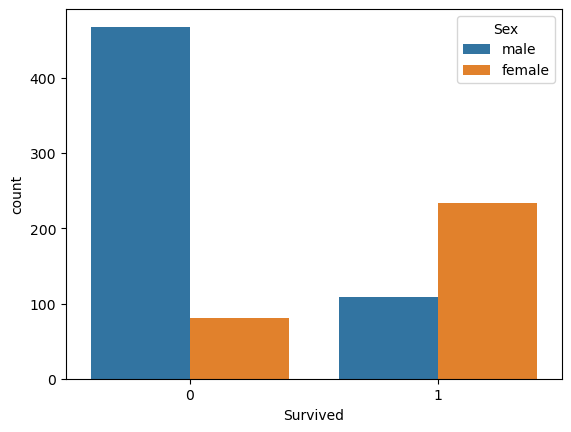

In [34]:
import seaborn as sns
sns.countplot(titanic, x = 'Survived', hue = 'Sex');